## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the datasets

In [2]:
df_tracks = pd.read_csv('tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Exploratory data analysis

In [3]:
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
sorted_df = df_tracks.sort_values('popularity',ascending = True)
least_liked_tracks = sorted_df[['name','popularity']].head(10)
least_liked_tracks

,name,popularity
546130,"Newspaper Reports On Abner, 20 February 1935",0
546222,恋は水の上で,0
546221,私の誕生日,0
546220,エル・チョクロ (EL CHOCLO),0
546219,恋は不思議なもの,0
546218,ゆうべはどうしたの (WHATSA MALLA U),0
546217,"Screen Director's Playhouse, Music For Million...",0
546216,ブルーマンボ,0
546215,"Screen Director's Playhouse, Trade Winds direc...",0
546214,"Screen Director's Playhouse, It's A Wonderful ...",0


In [6]:
most_liked_tracks = sorted_df[sorted_df['popularity'] >= 90]
most_liked_tracks = most_liked_tracks[['name','popularity']].tail(10).sort_values('popularity',ascending=False)
most_liked_tracks

,name,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),100
93803,drivers license,99
93804,Astronaut In The Ocean,98
92811,telepatía,97
92810,Save Your Tears,97
93805,Leave The Door Open,96
92813,Blinding Lights,96
92814,The Business,95
92819,Bandido,94
92816,Heartbreak Anniversary,94


In [7]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [8]:
df_tracks.set_index("release_date",inplace=True)
df_tracks.index = pd.to_datetime(df_tracks.index)

In [9]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [10]:
df_tracks.dropna(inplace = True)

In [11]:
df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms",inplace=True,axis=1)

In [12]:
corr_df = df_tracks.drop(["key","mode","explicit"],axis=1).corr(method="pearson")

In [13]:
corr_df

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
popularity,1.000000,0.186878,0.302178,0.327001,-0.047415,-0.370723,-0.236403,-0.048735,0.004558,0.071223,0.086713,0.027640
danceability,0.186878,1.000000,0.241464,0.251394,0.199291,-0.242838,-0.225831,-0.106175,0.528136,-0.040896,0.146166,-0.120408
energy,0.302178,0.241464,1.000000,0.764744,-0.053560,-0.715366,-0.195727,0.124636,0.372224,0.230006,0.188971,0.024785
loudness,0.327001,0.251394,0.764744,1.000000,-0.167140,-0.519423,-0.329255,0.029509,0.275416,0.189252,0.164376,0.000322
speechiness,-0.047415,0.199291,-0.053560,-0.167140,1.000000,0.069121,-0.102425,0.207062,0.046481,-0.086950,-0.114211,-0.125782
acousticness,-0.370723,-0.242838,-0.715366,-0.519423,0.069121,1.000000,0.204312,-0.004742,-0.180878,-0.195117,-0.173920,-0.064395
instrumentalness,-0.236403,-0.225831,-0.195727,-0.329255,-0.102425,0.204312,1.000000,-0.038836,-0.175195,-0.055380,-0.042209,0.069321
liveness,-0.048735,-0.106175,0.124636,0.029509,0.207062,-0.004742,-0.038836,1.000000,-0.000052,-0.014923,-0.024171,0.002140
valence,0.004558,0.528136,0.372224,0.275416,0.046481,-0.180878,-0.175195,-0.000052,1.000000,0.135198,0.105508,-0.163231
tempo,0.071223,-0.040896,0.230006,0.189252,-0.086950,-0.195117,-0.055380,-0.014923,0.135198,1.000000,0.031861,-0.001248


Text(0.5, 1.0, 'Correlation Heatmap between variables')

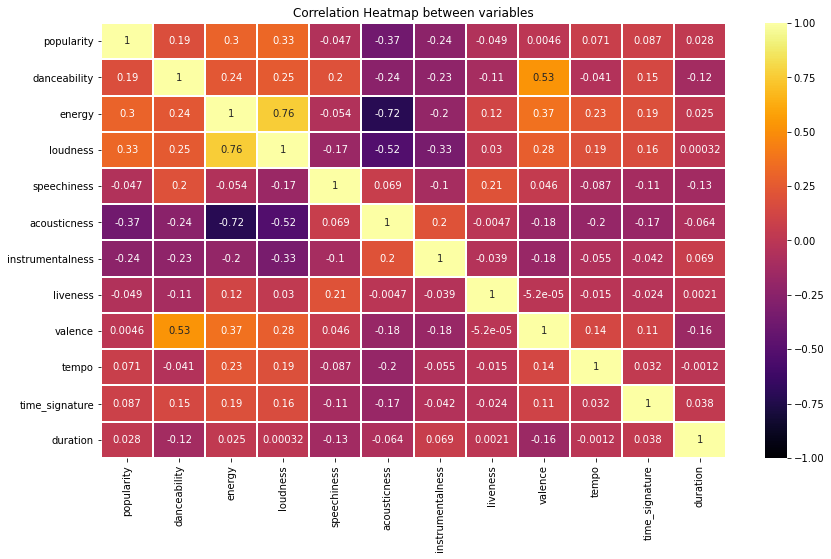

In [14]:
plt.figure(figsize=(14,8))
heatmap = sns.heatmap(corr_df,annot=True,vmin=-1,vmax=1,center=0,linewidth=1,cmap="inferno")
heatmap.set_title("Correlation Heatmap between variables")

In [15]:
sample_df = df_tracks.sample(int(0.002 * len(df_tracks)))

In [16]:
print(len(sample_df))

1173


[Text(0.5, 1.0, 'Loudness vs Energy')]

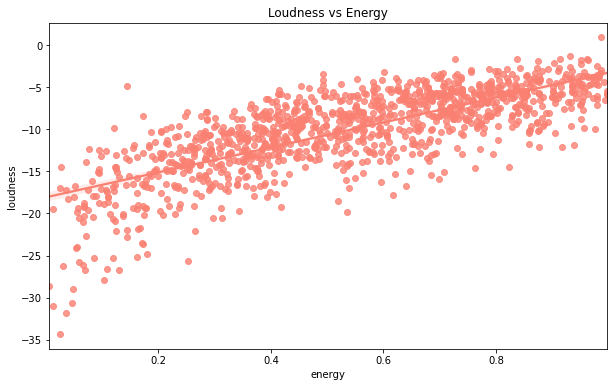

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y="loudness", x="energy", color="salmon").set(title = "Loudness vs Energy")

[Text(0.5, 1.0, 'Acousticness vs Energy')]

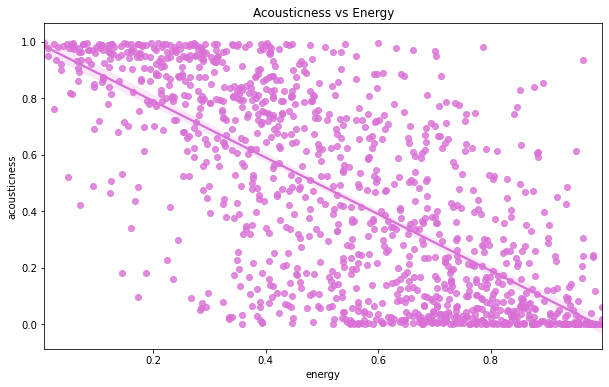

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y="acousticness", x="energy", color="orchid").set(title = "Acousticness vs Energy")

[Text(0.5, 1.0, 'Popularity vs Energy')]

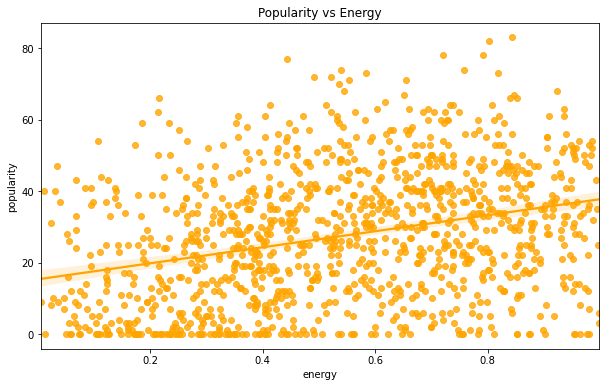

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y="popularity", x="energy", color="orange").set(title = "Popularity vs Energy")

In [20]:
df_tracks["dates"] = df_tracks.index.get_level_values('release_date')

In [21]:
df_tracks.dates = pd.to_datetime(df_tracks.dates)

In [22]:
years = df_tracks.dates.dt.year

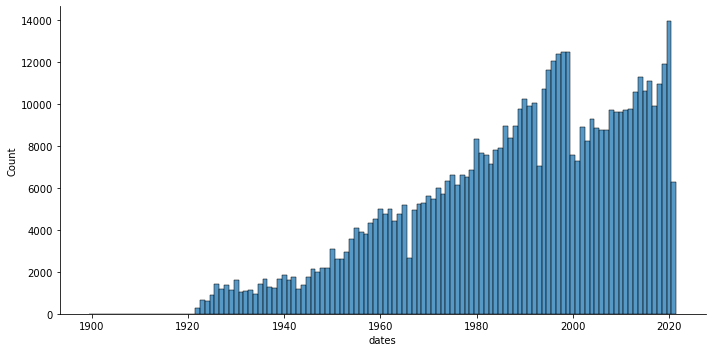

In [23]:
sns.displot(years,discrete=True,aspect=2,height=5, kind="hist")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

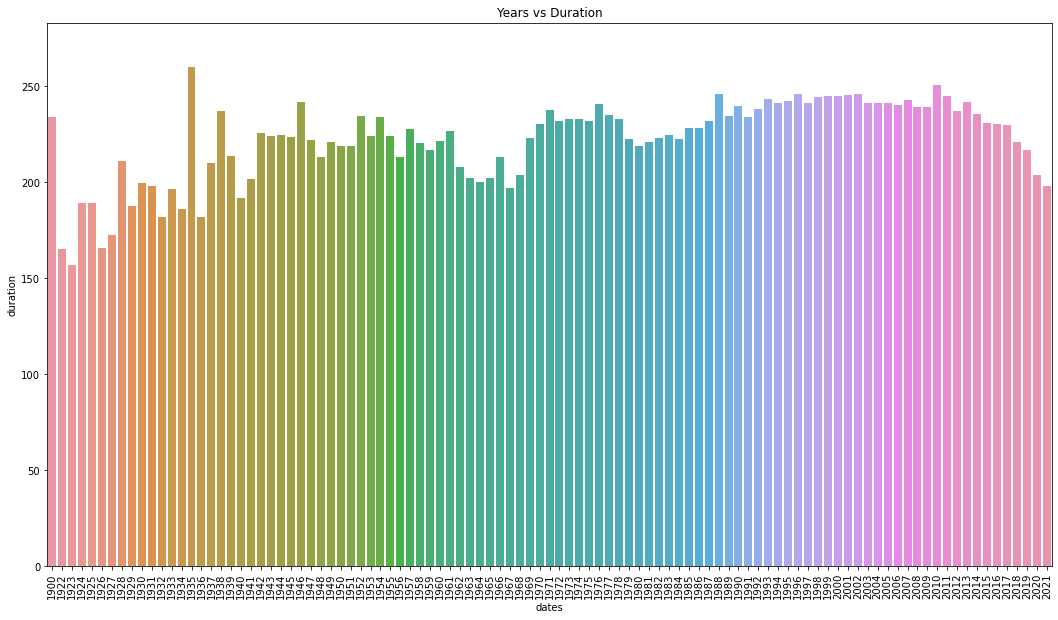

In [24]:
total_dr = df_tracks.duration

fig, ax = plt.subplots(figsize=(18,10))
fig = sns.barplot(x=years, y=total_dr, ax=ax, errwidth=False).set_title("Years vs Duration")
plt.xticks(rotation=90)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

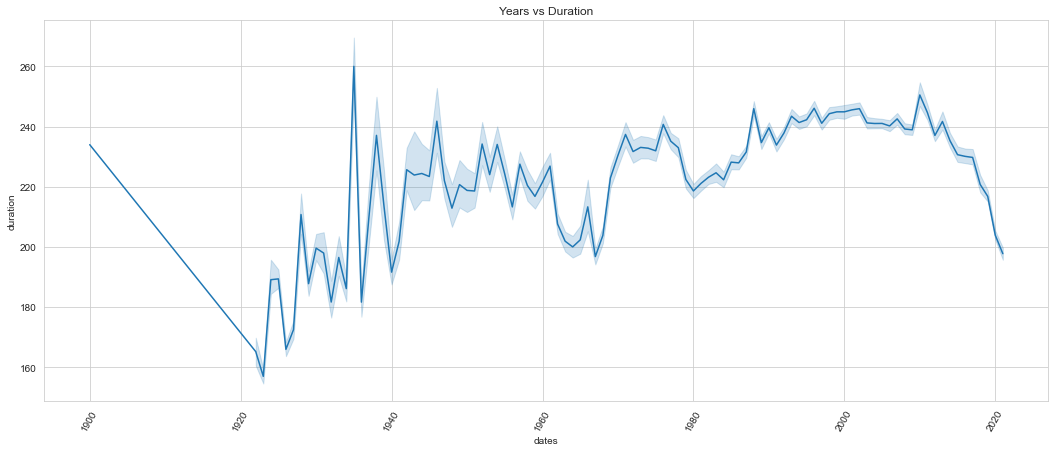

In [30]:
total_dr = df_tracks.duration
fig, ax = plt.subplots(figsize=(18,7))
fig = sns.lineplot(x=years, y=total_dr, ax=ax).set_title("Years vs Duration")
plt.xticks(rotation=60)

In [31]:
df_genre = pd.read_csv("SpotifyFeatures.csv")

In [32]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Genre')

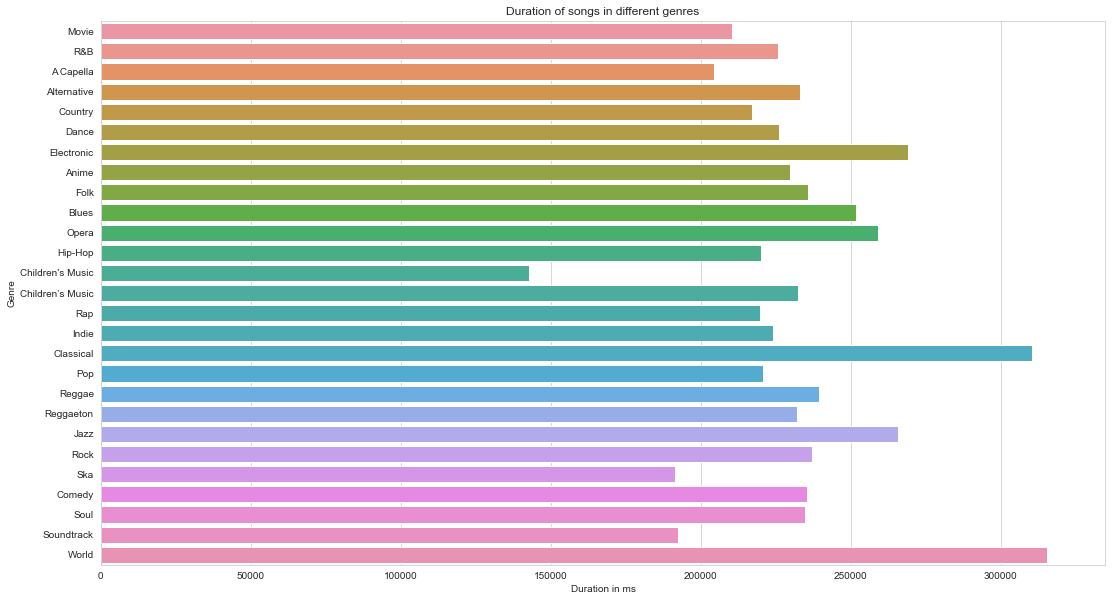

In [33]:
plt.figure(figsize=(18,10))
plt.title("Duration of songs in different genres")
sns.color_palette("pastel",as_cmap = True)
sns.barplot(y="genre",x="duration_ms",data=df_genre,errwidth=False)
plt.xlabel("Duration in ms")
plt.ylabel("Genre")